## Using Pyodbc and Pandas to execute SQL query. 

Sixian Chen

11/24/2020

LinkedIn: http://linkedin.com/in/seashane-sixian-chen

<div class="alert alert-block alert-info">
    
#### Background of this database 
This database was downloaded from *MS-Access2010 Tutorials*  .      
According to database's creator, Profsr Financial Services is a privately-owned broker for insurance, mutual funds and other financial instruments. The database was designed for helping the firm to track sales and commissions for 30 or so sales professionals. As is usually done in the business, sales persons are paid only on commission based on their performance. Their sales have to be analyzed constantly over time (weekly, monthly, annually) and by product and product line because certain persons specialize in certain product lines or specific products that may or may not be more profitable than others.  
The commission rate is different for different products. It may be calculated on the premium paid in the case of insurance or on the invested amount in the case of funds. There is also a second commission level which represents the amount paid to the agency.  
Sales and commissions reports will be produced as required, usually based on dates. Different groupings will be needed to analyze products, product lines, special promotions and so on.   
**Download Source**: http://www.ms-access2010.com/tutorials/download.html  
**For more information**: http://www.ms-access2010.com/tutorials/project.html  
<div>

In [586]:
import pandas as pd
import pyodbc
pd.set_option('display.max_rows', df.shape[0]+1)
pd.set_option('display.max_columns', df.shape[0]+1)
conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=C:\Users\ProfsrFinancial.accdb;') # Path of the MS Access accdb file

  
The following shows the relationships of the dataset's tables.

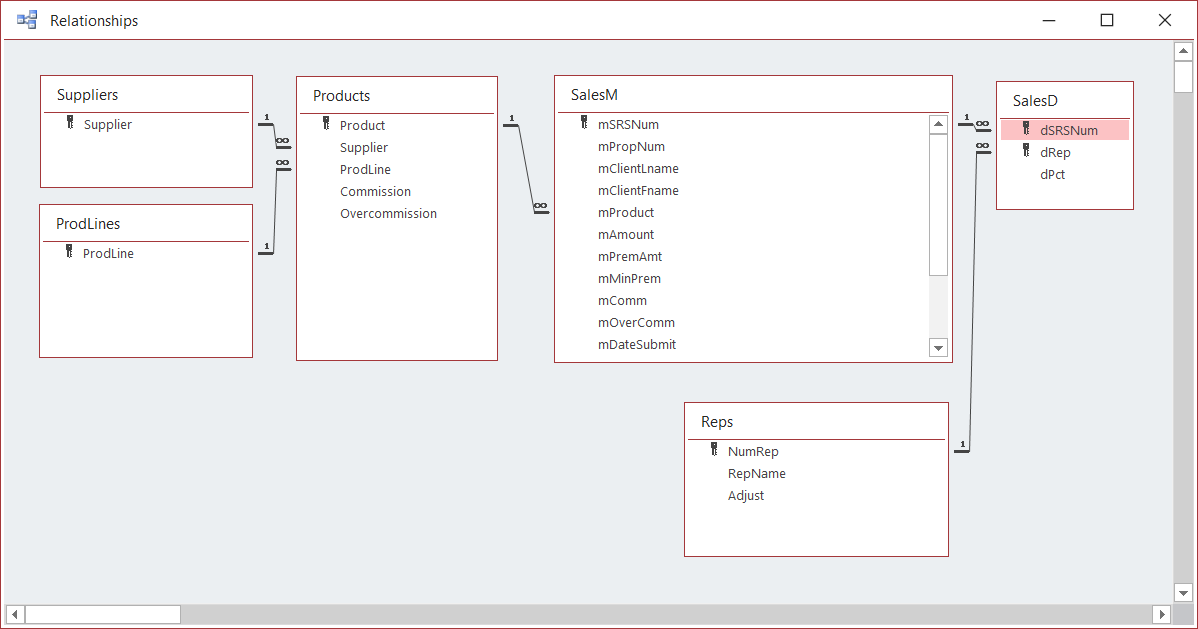

In [587]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:/Users" # Path of the attached picture file
Image(filename = PATH + "Relationship.png")

In [588]:
cursor = conn.cursor()
print("This database has the following tables:\n")
for table_info in cursor.tables(tableType='TABLE'):    
    print(table_info.table_name)

This database has the following tables:

ProdLines
Products
ReportDates
Reps
SalesD
SalesM
Suppliers
Switchboard Items


  
-------
<h3><center>PREVIEW OF ALL TABLES IN THIS DATABASE</center></h3>

In [589]:
queryProdLines = "select * from ProdLines"
dfProdLines = pd.read_sql(queryProdLines, conn)
print("Table: ProdLines")
dfProdLines

Table: ProdLines


,ProdLine
0,Annuity
1,Disability Ins.
2,Life Ins.
3,Mutual funds


In [590]:
queryProducts = "select * from Products"
dfProducts = pd.read_sql(queryProducts, conn)
print("Table: Products")
dfProducts.head(5)

Table: Products


,Product,Supplier,ProdLine,Commission,Overcommission
0,10 Payments,Excellence,Life Ins.,45.0,56.0
1,20 Payments,Excellence,Life Ins.,45.0,56.0
2,Accent-Life 10,Zurich,Life Ins.,35.0,40.0
3,Advantage Life Plus,Transamerica Life,Life Ins.,65.0,58.0
4,AGF funds,AGF,Mutual funds,5.0,100.0


In [591]:
queryReportDates = "select * from ReportDates"
dfReportDates = pd.read_sql(queryReportDates, conn)
print("Table: ReportDates")
dfReportDates

Table: ReportDates


,dateFrom,dateTo
0,2010-12-01,2010-12-19


In [592]:
queryReps = "select * from Reps"
dfReps = pd.read_sql(queryReps, conn)
print("Table: Reps")
dfReps.head(5)

Table: Reps


,NumRep,RepName,Adjust
0,1057,Adam Carson,33.0
1,1197,Jean Campo,33.0
2,1232,Guy Tripper,28.0
3,1266,Ronald Charles,33.0
4,1320,Ken Dye,33.0


In [593]:
querySalesD = "select * from SalesD"
dfSalesD = pd.read_sql(querySalesD, conn)
print("Table: SalesD")
dfSalesD.head(5)

Table: SalesD


,dSRSNum,dRep,dPct
0,1,1430,25.0
1,1,2623,75.0
2,2,3396,100.0
3,3,1197,100.0
4,4,1197,100.0


In [594]:
querySalesM = "select * from SalesM"
dfSalesM = pd.read_sql(querySalesM, conn)
print("Table: SalesM")
dfSalesM.head(5)

Table: SalesM


,mSRSNum,mPropNum,mClientLname,mClientFname,mProduct,mAmount,mPremAmt,mMinPrem,mComm,mOverComm,mDateSubmit,mRefused,mDateEmit,mPolicyNumber,mDateCanceled,mReason
0,1,013962,DOE,RICHARD,Perspecta (V.U),50000.0,1020.000000,818.400024,65.0,73.0,2011-01-27,False,2011-01-02,010956679,NaT,None
1,2,014049,DOE,GABRIEL,Horizon Progression: Pol.,112000.0,1080.000000,617.039978,20.0,100.0,2011-02-05,False,NaT,None,NaT,None
2,3,021834,DOE,MARCEL,Protector and Protector improved accelerated,50000.0,447.480011,447.480011,60.0,100.0,2011-01-27,False,2011-01-01,010956242,NaT,None
3,4,021836,DOE,JOANNE,Protector and Protector improved accelerated,50000.0,319.140015,319.140015,60.0,100.0,2011-01-27,False,2011-01-01,010956243,NaT,None
4,5,023205,DOE,DIANE,Protector and Protector improved accelerated,50000.0,569.510010,569.510010,60.0,100.0,2011-02-05,False,NaT,None,NaT,None


In [595]:
querySuppliers = "select * from Suppliers"
dfSuppliers = pd.read_sql(querySuppliers, conn)
print("Table: Suppliers")
dfSuppliers.head(5)

Table: Suppliers


,Supplier
0,ACA
1,AGF
2,AIG
3,AVDL
4,C.I.


In [596]:
querySI = "select * from [Switchboard Items]"
dfSI = pd.read_sql(querySI, conn)
print("Table: Switchboard Items")
dfSI.head(5)

Table: Switchboard Items


,SwitchboardID,ItemNumber,ItemText,Command,Argument
0,1,0,Main Switchboard,NaN,Default
1,1,1,Forms,1.0,2
2,1,2,Reports,1.0,3
3,1,3,Exit Application,6.0,
4,2,0,Forms Switchboard Page,0.0,None


  
-------
<h3><center>SQL QUERY EXAMPLES</center></h3>

In [597]:
query1 = "SELECT * FROM SalesM WHERE mProduct='Protector AND Protector improved accelerated' ORDER BY mAmount DESC"
df1 = pd.read_sql(query1, conn)
print("\n1. Execute a table which shows the data of the product 'Protector and Protector improved accelerated' in table SalesM sorting by the investment amount in descending order.\n")
print("The query is: \n", query1,";")
df1


1. Execute a table which shows the data of the product 'Protector and Protector improved accelerated' in table SalesM sorting by the investment amount in descending order.

The query is: 
 SELECT * FROM SalesM WHERE mProduct='Protector AND Protector improved accelerated' ORDER BY mAmount DESC ;


,mSRSNum,mPropNum,mClientLname,mClientFname,mProduct,mAmount,mPremAmt,mMinPrem,mComm,mOverComm,mDateSubmit,mRefused,mDateEmit,mPolicyNumber,mDateCanceled,mReason
0,73,010954622,DOE,JOHN,Protector and Protector improved accelerated,60210.0,4744.470215,4744.470215,60.0,100.0,2010-12-17,False,2010-11-06,010954622,None,None
1,5,023205,DOE,DIANE,Protector and Protector improved accelerated,50000.0,569.510010,569.510010,60.0,100.0,2011-02-05,False,NaT,None,None,None
2,4,021836,DOE,JOANNE,Protector and Protector improved accelerated,50000.0,319.140015,319.140015,60.0,100.0,2011-01-27,False,2011-01-01,010956243,None,None
3,3,021834,DOE,MARCEL,Protector and Protector improved accelerated,50000.0,447.480011,447.480011,60.0,100.0,2011-01-27,False,2011-01-01,010956242,None,None
4,50,010952954,DOE,MAURICE,Protector and Protector improved accelerated,45119.0,2966.699951,2966.699951,60.0,100.0,2010-12-07,False,2010-10-27,010952954,None,None
5,39,023196,DOE,NOAH,Protector and Protector improved accelerated,23160.0,277.790009,277.790009,60.0,100.0,2011-02-09,False,NaT,None,None,None
6,77,010950989,DOE,DAPHNE,Protector and Protector improved accelerated,20000.0,302.980011,302.980011,60.0,100.0,2010-10-14,False,2010-09-06,010950989,None,None
7,22,207871,DOE,JUDITH,Protector and Protector improved accelerated,15000.0,297.089996,297.089996,60.0,100.0,2011-02-05,False,NaT,None,None,None
8,6,023206,DOE,ROGER,Protector and Protector improved accelerated,10000.0,520.510010,520.510010,60.0,100.0,2011-01-27,False,2010-12-23,010956241,None,None


In [598]:
query2 = "SELECT avg(mAmount) as [average investment amount] FROM SalesM WHERE mProduct='Protector AND Protector improved accelerated' "
df2 = pd.read_sql(query2, conn)
print("\n2. What is average investment amount of 'Protector and Protector improved accelerated'?\n")
print("The query is: \n", query2,";")
df2


2. What is average investment amount of 'Protector and Protector improved accelerated'?

The query is: 
 SELECT avg(mAmount) as [average investment amount] FROM SalesM WHERE mProduct='Protector AND Protector improved accelerated'  ;


,average investment amount
0,35943.222222


In [599]:
query3 = "SELECT mClientFname, mClientLname FROM SalesM, SalesD, Reps WHERE Reps.NumRep=SalesD.dRep AND SalesD.dSRSNum=SalesM.mSRSNum AND RepName='Adam Carson' "
df3 = pd.read_sql(query3, conn)
print("\n3. Execute the client list whose representative is 'Adam Carson'.\n")
print("The query is: \n", query3,";")
df3


3. Execute the client list whose representative is 'Adam Carson'.

The query is: 
 SELECT mClientFname, mClientLname FROM SalesM, SalesD, Reps WHERE Reps.NumRep=SalesD.dRep AND SalesD.dSRSNum=SalesM.mSRSNum AND RepName='Adam Carson'  ;


,mClientFname,mClientLname
0,PATRICIA,DOE
1,JAM,DOE
2,TONY,DOE
3,MIKE,DOE
4,JOAN,DOE


In [600]:
query4 = "SELECT RepName, mClientFname, mClientLname, mDateSubmit,mAmount FROM SalesM, SalesD, Reps WHERE Reps.NumRep=SalesD.dRep AND SalesD.dSRSNum=SalesM.mSRSNum AND mAmount>100000 AND YEAR(mDateSubmit) = 2010"
df4 = pd.read_sql(query4, conn)
print("\n4. Execute a list of representatives whose client had an investment amount over 100000 in year 2010, with the corresponding client names.\n")
print("The query is: \n", query4,";")
df4


4. Execute a list of representatives whose client had an investment amount over 100000 in year 2010, with the corresponding client names.

The query is: 
 SELECT RepName, mClientFname, mClientLname, mDateSubmit,mAmount FROM SalesM, SalesD, Reps WHERE Reps.NumRep=SalesD.dRep AND SalesD.dSRSNum=SalesM.mSRSNum AND mAmount>100000 AND YEAR(mDateSubmit) = 2010 ;


,RepName,mClientFname,mClientLname,mDateSubmit,mAmount
0,Carl Brunet,MELANIE,DOE,2010-10-19,110000.0
1,Carl Brunet,CHRIS,DOE,2010-12-03,110000.0
2,Mike Jordan,CLAUDE,DOE,2010-10-28,164299.0
3,Jean Lefrank,CLARISSA,DOE,2010-12-12,550000.0
4,Mark McDuff,LUCY,DOE,2010-11-06,255276.0


In [601]:
query5 = "SELECT * FROM (SELECT RepName, sum(mAmount) as sumAmount FROM SalesM, SalesD, Reps WHERE Reps.NumRep=SalesD.dRep AND SalesD.dSRSNum=SalesM.mSRSNum AND YEAR(mDateSubmit)=2011 GROUP BY RepName) ORDER BY sumAmount DESC"
df5 = pd.read_sql(query5, conn)
print("\n5. Execute a list of representatives and their managed total investment amount in 2011 sorting by the total investment amount in descending order.\n")
print("The query is: \n", query5,";")
df5


5. Execute a list of representatives and their managed total investment amount in 2011 sorting by the total investment amount in descending order.

The query is: 
 SELECT * FROM (SELECT RepName, sum(mAmount) as sumAmount FROM SalesM, SalesD, Reps WHERE Reps.NumRep=SalesD.dRep AND SalesD.dSRSNum=SalesM.mSRSNum AND YEAR(mDateSubmit)=2011 GROUP BY RepName) ORDER BY sumAmount DESC ;


,RepName,sumAmount
0,Peter Carpenter,3000000.0
1,Adam Carson,3000000.0
2,Danielle Marcotte,2000000.0
3,Sylvia Mason,902000.0
4,Francine Robinson,585000.0
5,Robert Lepage,420000.0
6,Ben St-Pierre,347040.0
7,Jean Campo,306160.0
8,Jack Boise,250000.0
9,Mark McDuff,250000.0


In [602]:
query6 = "SELECT mPropNum, mClientFname, mClientLname, mMinPrem from SalesM WHERE mMinPrem > (SELECT avg(mMinPrem) FROM SalesM) ORDER BY mMinPrem ASC"
df6 = pd.read_sql(query6, conn)
print("\n6. Execute a list of clients with mPropNum whose minimum premium is greater than the average minimum premium in ascending order.\n")
print("The query is: \n", query6,";")
df6


6. Execute a list of clients with mPropNum whose minimum premium is greater than the average minimum premium in ascending order.

The query is: 
 SELECT mPropNum, mClientFname, mClientLname, mMinPrem from SalesM WHERE mMinPrem > (SELECT avg(mMinPrem) FROM SalesM) ORDER BY mMinPrem ASC ;


,mPropNum,mClientFname,mClientLname,mMinPrem
0,4176026R,BRENDA,DOE,2450.000000
1,208689,STAN,DOE,2615.760010
2,4272246R,DONALD,DOE,2803.000000
3,4275202R,FRANK,DOE,2803.000000
4,010952534,JACQUE,DOE,2966.669922
5,010952954,MAURICE,DOE,2966.699951
6,010952535,NICOLE,DOE,2966.699951
7,4328543R,MIKE,DOE,3000.000000
8,L10689751,LUCILLE,DOE,3353.280029
9,4311470R,DENISE,DOE,3474.000000


In [603]:
query7 = "SELECT ProdLine, supplier, avg(mAmount) as avgAmount, avg(mPremAmt) as avgPremium, min(mPremAmt) as minPremium, max(mPremAmt) as maxPremium, avg(mComm) as avgCommision, min(mComm) as minCommision, max(mComm) as maxCommision from SalesM, Products WHERE SalesM.mProduct=Products.Product GROUP BY ProdLine, Supplier ORDER BY avg(mAmount) DESC"
df7 = pd.read_sql(query7, conn)
print("\n7. Execute a list to show the average investment amount, the average, min, max of premium and commision rate, grouping by product line then by suppliers, and sorting by the average investment amount with the highest on top.\n")
print("The query is: \n", query7,";")
df7


7. Execute a list to show the average investment amount, the average, min, max of premium and commision rate, grouping by product line then by suppliers, and sorting by the average investment amount with the highest on top.

The query is: 
 SELECT ProdLine, supplier, avg(mAmount) as avgAmount, avg(mPremAmt) as avgPremium, min(mPremAmt) as minPremium, max(mPremAmt) as maxPremium, avg(mComm) as avgCommision, min(mComm) as minCommision, max(mComm) as maxCommision from SalesM, Products WHERE SalesM.mProduct=Products.Product GROUP BY ProdLine, Supplier ORDER BY avg(mAmount) DESC ;


,ProdLine,supplier,avgAmount,avgPremium,minPremium,maxPremium,avgCommision,minCommision,maxCommision
0,Life Ins.,Transamerica Life,250000.000000,459.000000,459.000000,459.000000,37.500000,37.5,37.5
1,Life Ins.,RBC,250000.000000,334.799988,334.799988,334.799988,35.000000,35.0,35.0
2,Life Ins.,AVDL,170171.934426,2713.521643,113.040001,50000.000000,49.491803,20.0,60.0
3,Mutual funds,AGF,100000.000000,0.000000,0.000000,0.000000,5.000000,5.0,5.0
4,Life Ins.,Zurich,100000.000000,477.359985,477.359985,477.359985,42.500000,42.5,42.5
5,Life Ins.,Standard Life,100000.000000,2310.000000,1020.000000,3600.000000,65.000000,65.0,65.0
6,Life Ins.,AIG,100000.000000,5555.000000,5555.000000,5555.000000,32.500000,32.5,32.5
7,Annuity,AVDL,14755.161696,5624.833844,903.000000,28803.000000,1.500000,1.5,1.5
8,Life Ins.,ACA,11500.000000,493.860001,415.079987,572.640015,60.000000,60.0,60.0


In [604]:
query8 = "SELECT Supplier FROM Suppliers WHERE Suppliers.Supplier NOT IN (SELECT DISTINCT Supplier FROM Products)"
df8 = pd.read_sql(query8, conn)
print("\n8. Execute a list of suppliers who are in the Suppliers table but not in the Products table .\n")
print("The query is: \n", query8,";")
df8


8. Execute a list of suppliers who are in the Suppliers table but not in the Products table .

The query is: 
 SELECT Supplier FROM Suppliers WHERE Suppliers.Supplier NOT IN (SELECT DISTINCT Supplier FROM Products) ;


,Supplier
0,Fidelity
1,Sun Life


In [605]:
query9 = "SELECT mProduct, count(mProduct) as ProductCounts, sum(mAmount) as SumAmount FROM SalesM WHERE YEAR(mDateSubmit)=2011 AND MONTH(mDateSubmit)=2 GROUP BY mProduct ORDER BY sum(mAmount) DESC"
df9 = pd.read_sql(query9, conn)
print("\n9. Execute a list of product with the total counts of cases and sum of investment amount with Submission date in February 2011, order by the sum of investment amount desceding.\n")
print("The query is: \n", query9,";")
df9


9. Execute a list of product with the total counts of cases and sum of investment amount with Submission date in February 2011, order by the sum of investment amount desceding.

The query is: 
 SELECT mProduct, count(mProduct) as ProductCounts, sum(mAmount) as SumAmount FROM SalesM WHERE YEAR(mDateSubmit)=2011 AND MONTH(mDateSubmit)=2 GROUP BY mProduct ORDER BY sum(mAmount) DESC ;


,mProduct,ProductCounts,SumAmount
0,Horizon Liberty accelerated,7,2475000.0
1,Quietude +T65 accelerated,2,525000.0
2,Horizon 10 : 100 000 to 499 999 $,2,300000.0
3,"Temporary 10 Plus: 50,000 - 999,999$",1,250000.0
4,T - 10,1,250000.0
5,Horizon Progression accelerated,2,225000.0
6,Horizon 20 accelerated : 100 000 to 499 999 $,2,200000.0
7,Perspecta (V.U),1,150000.0
8,Horizon Progression: Pol.,1,112000.0
9,Qualiterm 10,1,100000.0


In [606]:
query10 = "SELECT TOP 5 mProduct, avg(mPremAmt/mAmount)*100 as [% of Premium over Amount] FROM SalesM GROUP BY mProduct ORDER BY avg(mPremAmt/mAmount) DESC "
df10 = pd.read_sql(query10, conn)
print("\n10. Execute a list of products which are in top 5 Premium over Investment Amount rate, sorting by the rate in descending order.\n")
print("The query is: \n", query10,";")
df10


10. Execute a list of products which are in top 5 Premium over Investment Amount rate, sorting by the rate in descending order.

The query is: 
 SELECT TOP 5 mProduct, avg(mPremAmt/mAmount)*100 as [% of Premium over Amount] FROM SalesM GROUP BY mProduct ORDER BY avg(mPremAmt/mAmount) DESC  ;


,mProduct,% of Premium over Amount
0,IPS 3,64.429221
1,Solo,22.908540
2,ART 75,5.555000
3,Protector Future 20 accelerated,4.982868
4,Life Certified,4.503050
